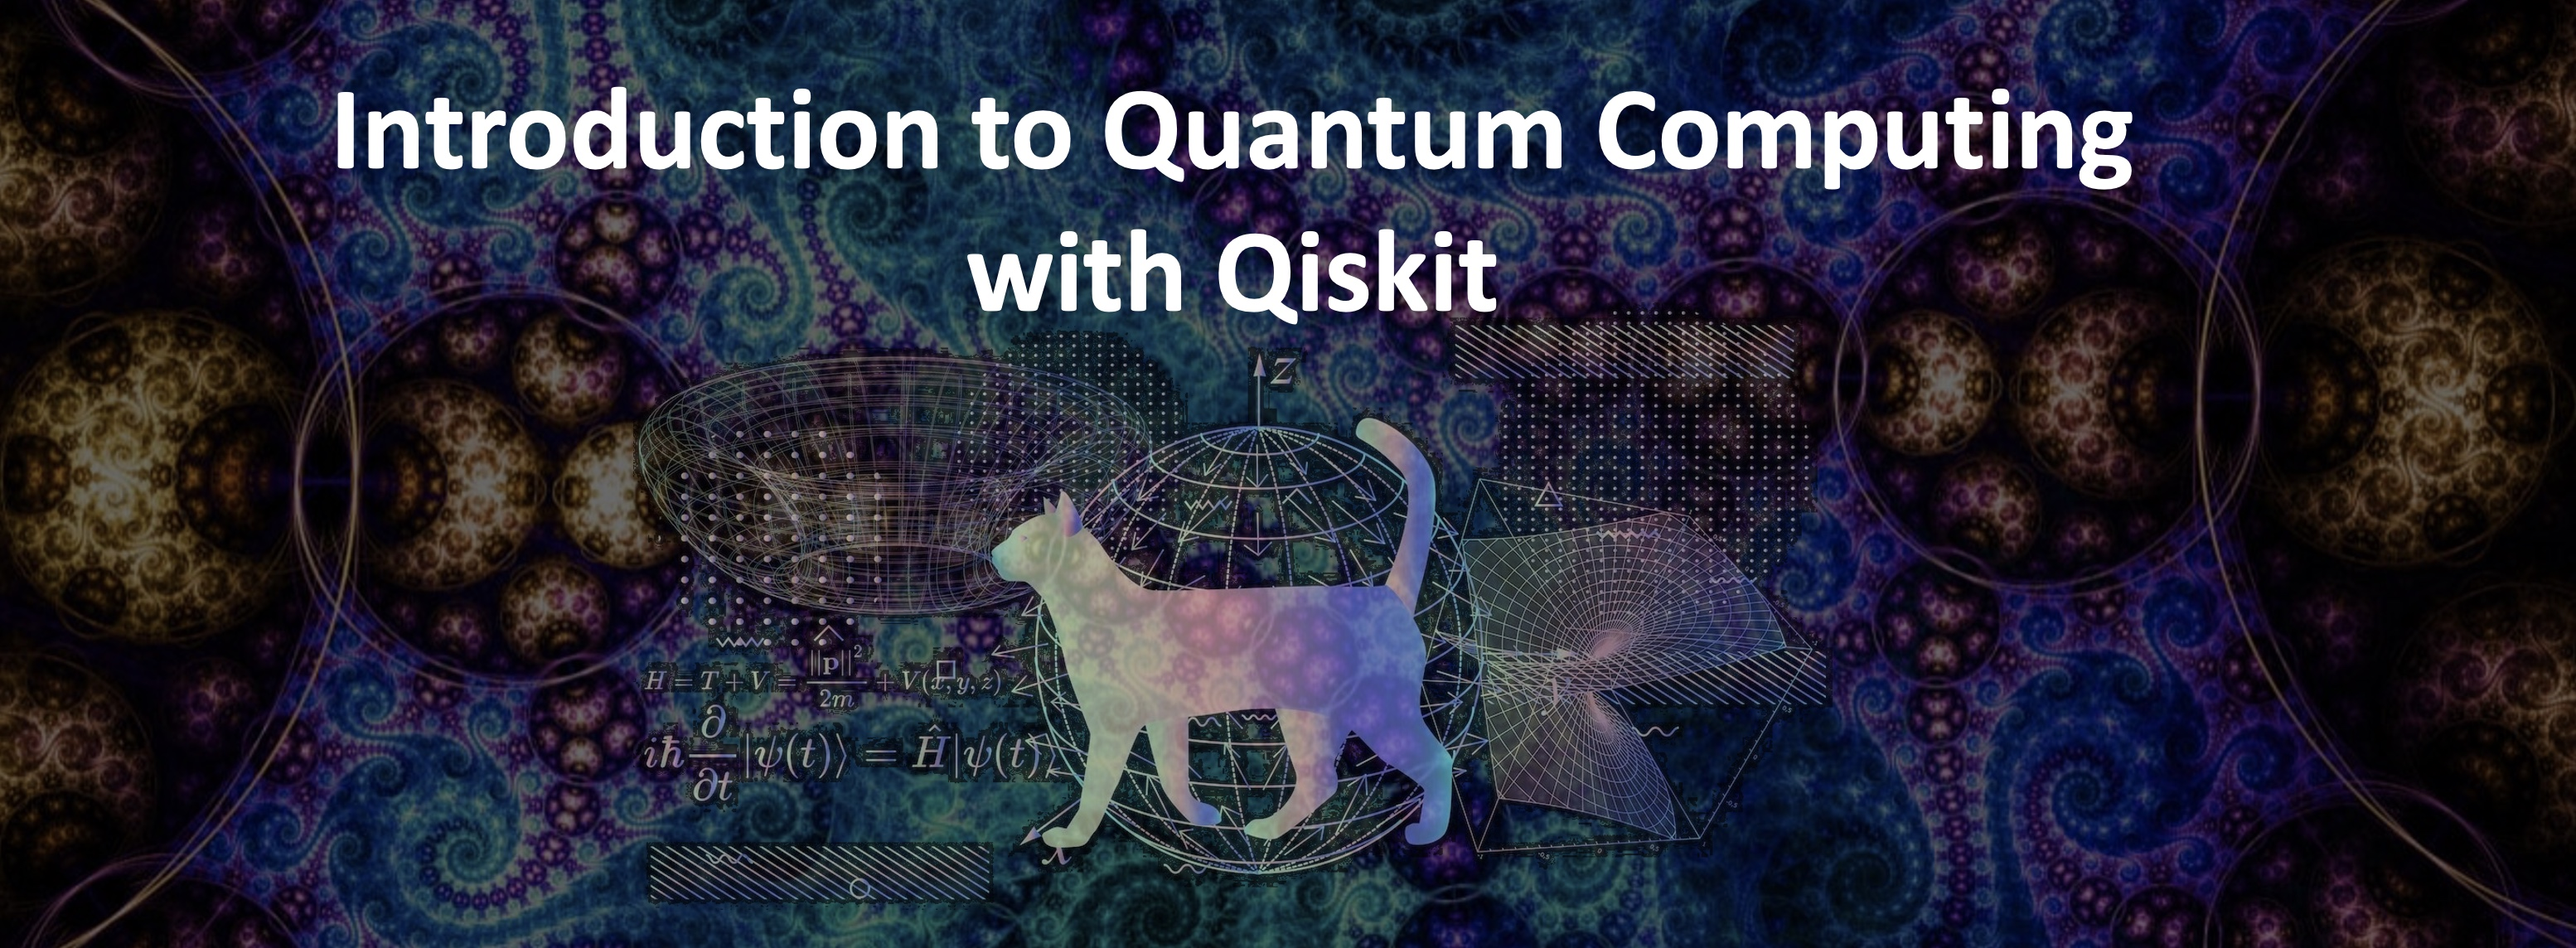

# Table of Contents
- [Introduction](#intro)
- [Part 0: Let's Set-Up our Environment and Install Qiskit](#setup)
- [Part I: Creating our Circuit](#part1)
- [Part 2: Getting our Statevector and Fractal](#part2)
- [Part 3. Let's run it on a real Quantum Computer!](#part3)


# Patterns of Beauty in Quantum Computing <a name="intro"></a>
***Aknowledgement: This notebook/demo is inspired and adapted from the beautiful work done by Wiktor Mazin. Have a look [here](https://medium.com/qiskit/creating-fractal-art-with-qiskit-df69427026a0)***.  

## Introduction

New students to quantum computing will tell you that it’s hard to visualize the complex mathematics of qubits. Typically, we rely on the Bloch sphere and [Q-sphere](https://learning.quantum.ibm.com/tutorial/explore-gates-and-circuits-with-the-quantum-composer#q-sphere-view).

However, given the richness of the field of complex numbers, there are plenty of more visually interesting ways to represent quantum information. One such way is through [fractals](https://en.wikipedia.org/wiki/Fractal). Fractals have long been a field of interest and exploration among mathematicians, artists, psychologists, neuroscientists, and authors. They comprise some amazing [shapes](https://www.treehugger.com/amazing-fractals-found-in-nature-4868776): the Mandelbrot set, Romanesco broccoli, snow flakes, tree branches, copper crystals, and more.

They’re visually stunning, yet, mathematically simple, and we can use them to visualize various things in our universe — including qubit states. In this notebook, you'll learn how to generate your own fractals using both quantum simulators and real quantum computers. You'll get to see how beauty, randomness and nature are closely related and how quantum computing helps us have look at it.

Let's get started!



## Part 0. Let's Set-Up our Environment and Install Qiskit <a name="setup"></a>


In [3]:
### Install Qiskit

!pip install qiskit[visualization]==1.0.2
!pip install qiskit_aer
!pip install qiskit_ibm_runtime
!pip install matplotlib
!pip install pylatexenc
!pip install prototype-zne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.4 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=b9268bdce28be11186850a3a1e769543caa7e1922200c9b8bce2f30f4de551c2
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [20]:
# import of required libraries and modules

import numpy as np
from math import pi,sqrt
from typing import List, Callable
from scipy.optimize import minimize
from scipy.optimize._optimize import OptimizeResult
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator, SparsePauliOp
from qiskit.primitives import StatevectorSampler, PrimitiveJob
from qiskit.circuit.library import TwoLocal
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import *
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke
from qiskit_ibm_runtime import Session, EstimatorV2 as Estimator
from qiskit_aer import AerSimulator


# Importing standard python libraries
import numpy as np
from math import pi,sqrt
import matplotlib.pyplot as plt

## Part 1. Let's create our Quantum Circuit<a name="part1"></a>

We will use one qubit for simplicity but you can extend this as you wish. Use the code fragment below to create and modify your individual circuit you would like to visualize.

In [50]:
# Start with an one qubit quantum circuit yielding a nice fractal. Change the circuit as you like.
qc = QuantumCircuit(1,1)
qc.h(0)
qc.u(pi/4, -pi/3, pi/8, 0)

Now, we'll visualize our qubit state to see what our quantum state looks like.

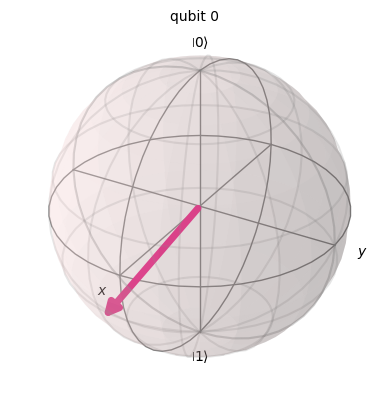

In [49]:
plot_bloch_multivector(qc)

 ## Part 2: Getting our Statevector and Fractal <a name="part2"></a>

As a quick review: quantum computing leverages the properties of quantum superposition, interference, and entanglement to perform calculations. We use the mathematics of vectors, matrices, and [complex numbers](https://en.wikipedia.org/wiki/Complex_number) to write down what qubit states look like, where complex numbers are those of the form a + bi, i being equal to the square root of negative 1. Complex numbers find use across physics, and are a necessity in order for quantum theory to accurately describe nature,

Meanwhile, fractals are mathematical objects that exhibit similar patterns at all scales, so they can represent systems that display self-similarity across both space and time. There are different [iterative techniques](https://en.wikipedia.org/wiki/Fractal#Common_techniques_for_generating_fractals) for generating fractals, one of them being escape-time fractals like the [Julia set](https://en.wikipedia.org/wiki/Julia_set). We compute these fractals by assigning a complex number to every point on the complex plane — we would plot the complex number z = (x + yi) at (x,y). We iteratively apply a function to each point. If the function converges for the point, it’s part of the fractal and we chose a color for it. If it diverges, it is not and it remains uncolored.

Julia set fractals are a simple kind of escape-time fractal where iteratively update the value of z using the formula z = z² + c, with c being a complex constant. If the absolute value of z stays below 2 after a finite number of iterations, that point is said to be in the Julia set and is colored accordingly. Since the power of quantum states comes from their complex coefficients, we can use these coefficients as the c of a Julia set.

In [48]:
# Obtain the statevector
state = Statevector.from_instruction(qc)

In [18]:
# Using the statevector to obtain a noise-free fractal.

# Extract the first element of the state vector as z0 and the second element as z1.
z0 = state.data[0]
z1 = state.data[1]


# Goal: One complex number for the Julia set fractal.
if z1.real != 0 or z1.imag != 0:
    z = z0/z1
    z = round(z.real, 2) + round(z.imag, 2) * 1j
else:
     z = 0

print("z= ",z)

# Define the size
size = 1000
heightsize = size
widthsize = size


def julia_set(c=z, height=heightsize, width=widthsize, x=0, y=0, zoom=1, max_iterations=100):

    # To make navigation easier we calculate these values
    x_width = 1.5
    y_height = 1.5*height/width
    x_from = x - x_width/zoom
    x_to = x + x_width/zoom
    y_from = y - y_height/zoom
    y_to = y + y_height/zoom

    # Here the actual algorithm starts and the z paramter is defined for the Julia set function
    x = np.linspace(x_from, x_to, width).reshape((1, width))
    y = np.linspace(y_from, y_to, height).reshape((height, 1))
    z = x + 1j * y

    # Initialize c to the complex number obtained from the quantum circuit
    c = np.full(z.shape, c)

    # To keep track in which iteration the point diverged
    div_time = np.zeros(z.shape, dtype=int)

    # To keep track on which points did not converge so far
    m = np.full(c.shape, True, dtype=bool)

    for i in range(max_iterations):
        z[m] = z[m]**2 + c[m]
        m[np.abs(z) > 2] = False
        div_time[m] = i
    return div_time

z=  (0.4+0.23j)


Now, let's plot our fractal!

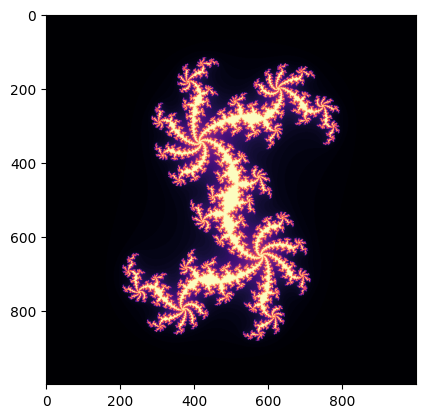

In [17]:
# plot the Julia set fractal
plt.imshow(julia_set(), cmap='magma') # viridis', 'plasma', 'inferno', 'magma', 'cividis'
plt.show()

It looks pretty amazing, doesn’t it?

Fractal art has been around since the mid ’80s, and talented fractal artists include [Desmond Paul Henry](https://en.wikipedia.org/wiki/Desmond_Paul_Henry), [Hamid Naderi Yeganeh](https://en.wikipedia.org/wiki/Hamid_Naderi_Yeganeh), [Carlos Ginzburg](https://en.wikipedia.org/wiki/Carlos_Ginzburg), [Vicky Brago-Mitchell](https://en.wikipedia.org/wiki/Vicky_Brago-Mitchell), [Scott Draves](https://en.wikipedia.org/wiki/Scott_Draves), [Kerry Mitchell](https://en.wikipedia.org/wiki/Kerry_Mitchell) and [Jackson Pollock](https://www.smithsonianmag.com/innovation/fractal-patterns-nature-and-art-are-aesthetically-pleasing-and-stress-reducing-180962738/). With quantum computing the aesthetics of fractal patterns are taken into another realm, it's as if nature is speaking to us in its own nature.

Keep in mind that our quantum circuit was run on a classical device, meaning we essentially simulated a quantum computer rather than using a real quantum device for our fractals. We plan to try that later, but for now, feel free to experiment and create your own quantum circuits to see what shapes you can produce.

For the best fractal results, avoid having the resulting circuit on the Bloch sphere's diagonals. You may need to experiment with different gates, phases, and circuits to create a design that generates an interesting fractal. You can create a 1-qubit quantum circuit by using the [Circuit Composer](https://quantum.ibm.com/lab) widget, or code one in the cells above. Make sure you rerun the cells to get your new results. The Circuit Composer widget allows you to create a 1-qubit quantum circuit by simply dragging nodes into the canvas.

Have fun being a creative quantum artist! ;)

## Part 3. Let's run it on a real Quantum Computer!<a name="part3"></a>

Critically, you need to **store your API token** to be able to use the real quantum devices on the cloud. You'll have 10 minutes running time for free each month!

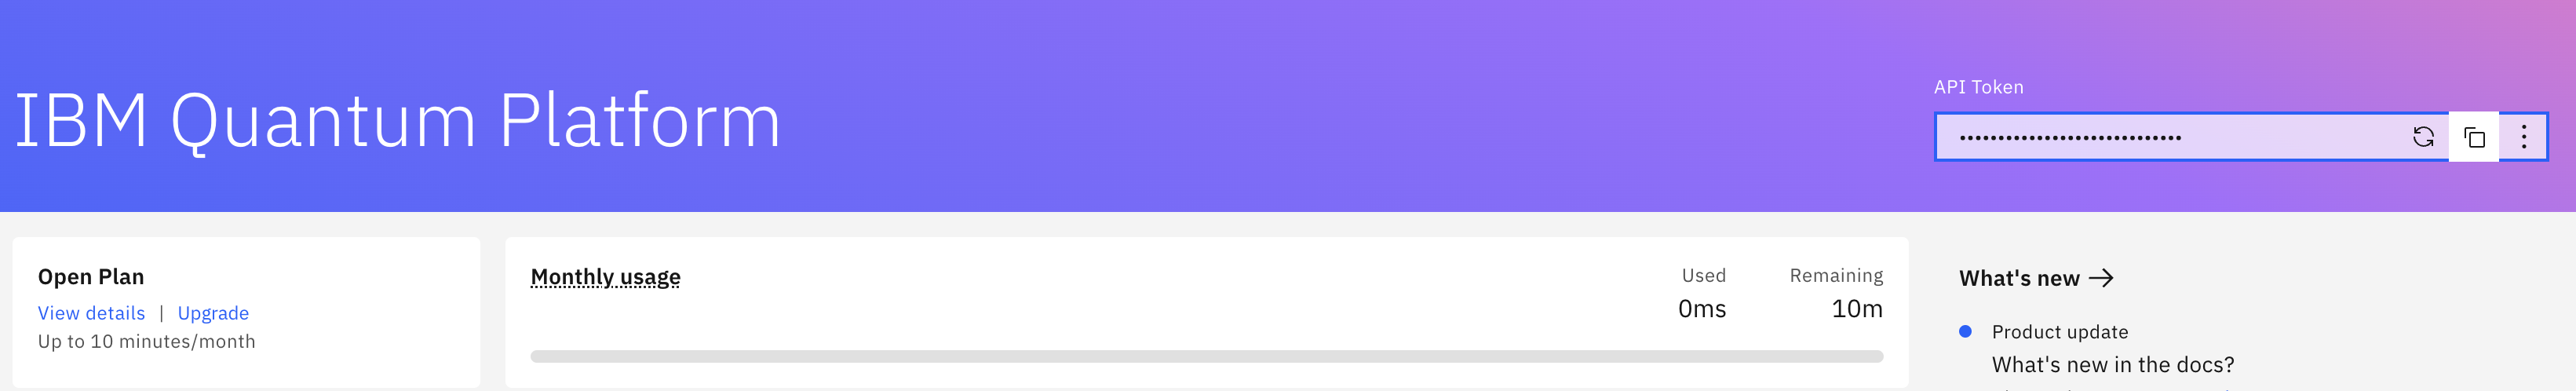

This is so important that we're also going to make it a step by step list.



1.   Navigate to the [IBM Quantum Platform](https://quantum.ibm.com/)
2.   Make sure you log in using the same email you registered with.
3.   Look to the top right corner, click and copy your API token (pictured above)
4.   In the code cell below, replace `deleteThisAndPasteYourTokenHere` with your token.

Note this will take probably long to run. In order to save you some time, we will provide the results from the example above. Feel free to skip that to see the difference between the quantum device and simulator!


In [52]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Replace 'YOUR_API_TOKEN' with the API token you copied earlier
QiskitRuntimeService.save_account(overwrite=True, channel='ibm_quantum', token='deleteThisAndPasteYourTokenHere')

# Now you can initialize the service
service = QiskitRuntimeService()

# list all available systems
service.backends()

# get the least busy system
backend = service.least_busy()
print("The least busy quantum computer now is", backend.name)


In [54]:
# Transpile the circuit for the selected backend
transpiled_qc = transpile(qc, backend=backend)

# Define the number of shots
shotno = 1024

# Run the circuit on the real quantum computer
job = backend.run(transpiled_qc, shots=shotno)
print("Job ID:", job.job_id())
print("Running on real quantum device. Please wait...")

# Wait for the job to complete and retrieve the result
result = job.result()
counts = result.get_counts()

# Display the measurement results
print("Counts:", counts)

<ipython-input-54-76925a7be28e>:8: DeprecationWarning: backend.run() and related sessions methods are deprecated  as of qiskit-ibm-runtime 0.23 and will be removed no sooner than 6 months after the release date. More details can be found in the primitives migration guide https://docs.quantum.ibm.com/migration-guides/qiskit-runtime.
  job = backend.run(transpiled_qc, shots=shotno)


Job ID: cwb68ykbhxtg008sdrm0
Running on real quantum device. Please wait...


KeyboardInterrupt: 

Now we use the results to plot our fractals!

{'0': 1756, '1': 8244}
Modified z from real quantum device: (0.4+0.23j)


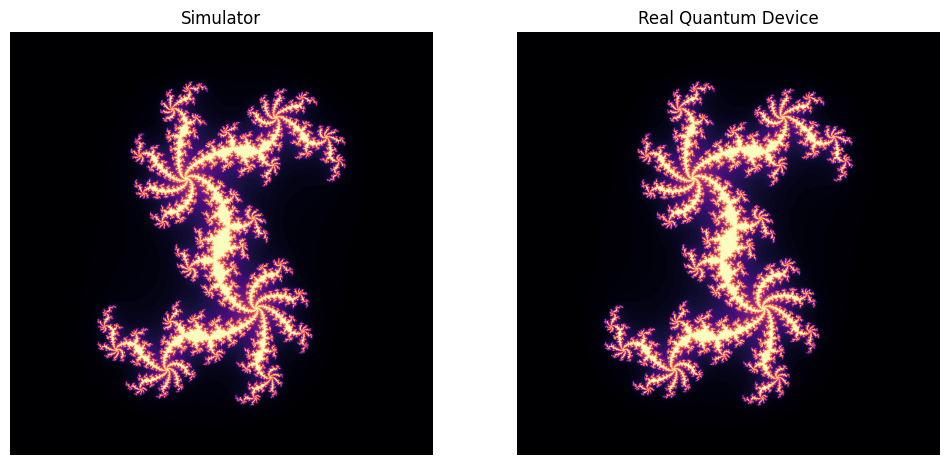

In [57]:
# Calculate observed probabilities
prob0qc = counts.get('0', 0) / shotno
prob1qc = counts.get('1', 0) / shotno

# Get probabilities from the statevector
prob0statevec = abs(z0)**2
prob1statevec = abs(z1)**2

# One simple approach to calculate a quantum computer-modified complex number
# amplitude^2 = probability
if prob0statevec != 0:
    z0qc = z0 * sqrt(prob0qc / prob0statevec)
else:
    z0qc = 0

if prob1statevec != 0:
    z1qc = z1 * sqrt(prob1qc / prob1statevec)
else:
    z1qc = 0

# Handle division by zero
if z1qc != 0:
    zqc = z0qc / z1qc
    zqc = round(zqc.real, 2) + round(zqc.imag, 2) * 1j
else:
    zqc = 0

print("Modified z from real quantum device:", zqc)

# Plot both Julia set fractals for comparison
f, axarr = plt.subplots(1, 2, figsize=(12, 6))
axarr[0].imshow(julia_set(c=z), cmap='magma')
axarr[0].set_title('Simulator')
axarr[0].axis('off')
axarr[1].imshow(julia_set(c=zqc), cmap='magma')
axarr[1].set_title('Real Quantum Device')
axarr[1].axis('off')
plt.show()

So, if you skipped this part or your quantum circuit is still running, have a look here. That's how your fractal is perhaps going to look like:

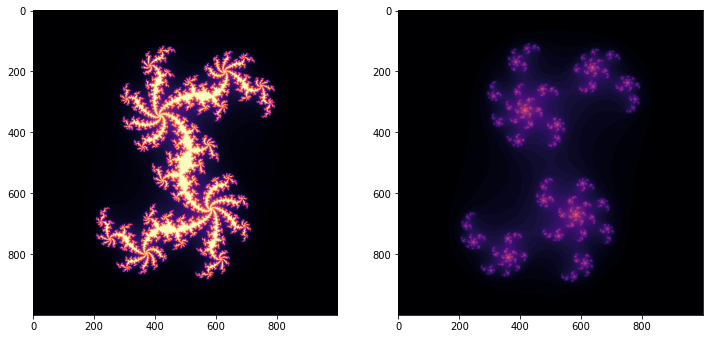

On the left we have our previous (classical) fractal and on the right we got our quantum fractal.
As you may have noticed, real-world is not always the same as the idealised world. There is noise or waiting time that we have to deal with every day. Quantum computers are not any different...but there are *real* and that makes them exciting. The fractals are not some simulation but the result of real qubits doing computation for us. A simulation of nature *by* *nature*. Pretty neat!

Reducing noise will allow us to move closer to the idealised simulation we saw in the classical part. But note, we have entered the [Era of Ultility](https://www.ibm.com/quantum/blog/what-is-quantum-utlity). This means we have now quantum computers with a large number of qubits that cannot be simulated by any classical simulators. Using more qubits may make our fractals even more interesting. Keep trying different circuits to see what shapes you can get but if you're interested in how we could reduce this noise to bring these quantum and classical results closer, feel free to go through the next notebook. We'll explore the concept of circuit depth and how we can play tetris to make quantum computer less noisy.

Congrats on reaching the finish line. Stay curious and creative! :)

# Additional information

**Created by:** Zina Efchary

**Original Notebook & Content by:** Wiktor Mazin
